<a href="https://colab.research.google.com/github/umesh024/CS-644-Deep-Learning-and-Data-Analytics-Lab-2025/blob/main/24MCS123_Experiment_No_2_Multilayer_Neaural_Network_and_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment 2 : Implement Multilayer Neural Networks and Nonlinear Activation Functions**

# **INTRODUCTION :**

The performance of deep neural networks is heavily influenced by the choice of activation functions, which introduce non-linearity, enabling the model to learn complex data representations. This work investigates the behavior of various nonlinear activation functions, ranging from traditional ones like Sigmoid, Tanh, and ReLU to more advanced variants such as Leaky ReLU, Parametric ReLU (PReLU), Exponential Linear Unit (ELU), Scaled Exponential Linear Unit (SELU), Swish, E-swish, Mish, and Gaussian Error Linear Unit (GELU).

# **ACTIVATION FUNCTIONS :**

#Overview of Activation Functions

Activation functions play a crucial role in deep neural networks by introducing non-linearity, enabling models to learn complex patterns and relationships within data. Without these functions, neural networks would behave like simple linear models, limiting their ability to solve real-world problems. This overview highlights key activation functions :

- **Sigmoid:**  
  The Sigmoid function is defined as:
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$
  It maps any input to the interval \((0,1)\). Its derivative, computed as
  $$
  \sigma'(x) = \sigma(x)(1 - \sigma(x)),
  $$
  is used during backpropagation. A drawback of the Sigmoid function is that it can lead to vanishing gradients for large positive or negative inputs.

- **Bipolar Sigmoid:**  
  This variant scales the Sigmoid output to \((-1,1)\) using the transformation
  $$
  f(x) = 2 \cdot \sigma(x) - 1,
  $$
  with the derivative being
  $$
  f'(x) = 2 \cdot \sigma(x)(1 - \sigma(x)).
  $$

- **Tanh**  
  The hyperbolic tangent function is given by:
  $$
  \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}},
  $$
  which maps inputs to the interval \((-1,1)\) and is zero-centered. Its derivative is:
  $$
  \frac{d}{dx}\tanh(x) = 1 - \tanh^2(x).
  $$
  Although Tanh typically converges faster than the Sigmoid function, it is still susceptible to vanishing gradients in the saturated regions.

- **Mish**  
  Mish is a recently proposed activation function defined as:
  $$
  \text{Mish}(x) = x \cdot \tanh(\ln(1+e^x)).
  $$
  It is non-monotonic and is designed to yield smoother gradient flows. An approximate derivative for Mish is computed as:
  $$
  \text{Mish}'(x) \approx \tanh(\ln(1+e^x)) + x \cdot \sigma(x) \cdot \left(1 - \tanh^2(\ln(1+e^x))\right),
  $$
  where \(\sigma(x)\) is the Sigmoid function.

- **TeLU** (Hyperbolic Tangent Exponential Linear Unit)  
  TeLU combines properties of the hyperbolic tangent and exponential functions. It is defined piecewise:
  $$
  \text{TeLU}(x) =
  \begin{cases}
  \tanh(x), & \text{if } x \geq 0 \\
  \alpha \, (e^x - 1), & \text{if } x < 0
  \end{cases}
  $$
  with the corresponding derivative:
  $$
  \text{TeLU}'(x) =
  \begin{cases}
  1 - \tanh^2(x), & \text{if } x \geq 0 \\
  \alpha \, e^x, & \text{if } x < 0.
  \end{cases}
  $$
  This design attempts to capture the benefits of both saturating and non-saturating behaviors.

- **ReLU (Rectified Linear Unit):**  
  Defined as  
  $$
  \text{ReLU}(x) = \max(0, x),
  $$
  its derivative is simple:
  $$
  \text{ReLU}'(x) = \begin{cases} 1, & x > 0 \\ 0, & x \leq 0. \end{cases}
  $$
  Despite its popularity, ReLU can cause neurons to "die" if many inputs are negative.

- **Leaky ReLU:**  
  To alleviate the “dead neuron” problem, Leaky ReLU introduces a small slope for negative values:
  $$
  \text{Leaky ReLU}(x) = \begin{cases} x, & x > 0 \\ \alpha x, & x \leq 0, \end{cases}
  $$
  with derivative:
  $$
  \text{Leaky ReLU}'(x) = \begin{cases} 1, & x > 0 \\ \alpha, & x \leq 0. \end{cases}
  $$

- **Parametric ReLU (PReLU):**  
  Similar to Leaky ReLU but with the negative slope \(\alpha\) learned during training:
  $$
  \text{PReLU}(x) = \begin{cases} x, & x > 0 \\ \alpha x, & x \leq 0, \end{cases}
  $$
  and the derivative follows the same pattern as Leaky ReLU.

- **ELU (Exponential Linear Unit):**  
  Defined as:
  $$
  \text{ELU}(x) = \begin{cases} x, & x > 0 \\ \alpha (e^x - 1), & x \leq 0, \end{cases}
  $$
  with derivative:
  $$
  \text{ELU}'(x) = \begin{cases} 1, & x > 0 \\ \alpha e^x, & x \leq 0. \end{cases}
  $$

- **SELU (Scaled ELU):**  
  SELU scales the ELU output to promote self-normalization:
  $$
  \text{SELU}(x) = \lambda \begin{cases} x, & x > 0 \\ \alpha (e^x - 1), & x \leq 0, \end{cases}
  $$
  with derivative:
  $$
  \text{SELU}'(x) = \lambda \begin{cases} 1, & x > 0 \\ \alpha e^x, & x \leq 0. \end{cases}
  $$

- **Softplus:**  
  A smooth approximation of ReLU defined as:
  $$
  \text{Softplus}(x) = \ln(1 + e^x),
  $$
  with its derivative being the Sigmoid function.

- **Swish:**  
  Swish is defined as:
  $$
  \text{Swish}(x) = x \cdot \sigma(x),
  $$
  where \(\sigma(x)\) is the Sigmoid. Its derivative is given by:
  $$
  \text{Swish}'(x) = \sigma(x) + x \cdot \sigma(x)(1 - \sigma(x)).
  $$

- **E-swish:**  
  A scaled version of Swish:
  $$
  \text{E-swish}(x) = \beta \, x \cdot \sigma(x),
  $$
  with derivative:
  $$
  \text{E-swish}'(x) = \beta \left[\sigma(x) + x \cdot \sigma(x)(1 - \sigma(x))\right].
  $$

- **GELU (Gaussian Error Linear Unit):**  
  GELU approximates the integration of the Gaussian distribution:
  $$
  \text{GELU}(x) = 0.5 \, x \left[1 + \tanh\left(\sqrt{\frac{2}{\pi}}\left(x + 0.044715\, x^3\right)\right)\right].
  $$
  An approximate derivative is computed using the chain rule and properties of the hyperbolic tangent.

- **Softmax**  
  The Softmax function is generally used in the output layer for multi-class classification tasks. It converts logits to probabilities:
  $$
  \text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}},
  $$
  and is typically combined with the cross-entropy loss during training. (A standalone derivative is not usually computed.)


# **Implementing Multilayer Neural Network with Nonlinear Activation Functions :**

Training with Sigmoid activation...
Sigmoid Accuracy: 0.5000
Training with Bipolar Sigmoid activation...
Bipolar Sigmoid Accuracy: 0.8500
Training with Tanh activation...
Tanh Accuracy: 0.8550
Training with Mish activation...
Mish Accuracy: 0.8200
Training with TeLU activation...
TeLU Accuracy: 0.8450
Training with ReLU activation...
ReLU Accuracy: 0.8600
Training with Leaky ReLU activation...
Leaky ReLU Accuracy: 0.8400
Training with Parametric ReLU activation...
Parametric ReLU Accuracy: 0.8500
Training with ELU activation...
ELU Accuracy: 0.8500
Training with Softplus activation...
Softplus Accuracy: 0.8400
Training with Swish activation...
Swish Accuracy: 0.8600
Training with E-swish activation...
E-swish Accuracy: 0.8400
Training with GELU activation...
GELU Accuracy: 0.8250
Training with SELU activation...
SELU Accuracy: 0.8600


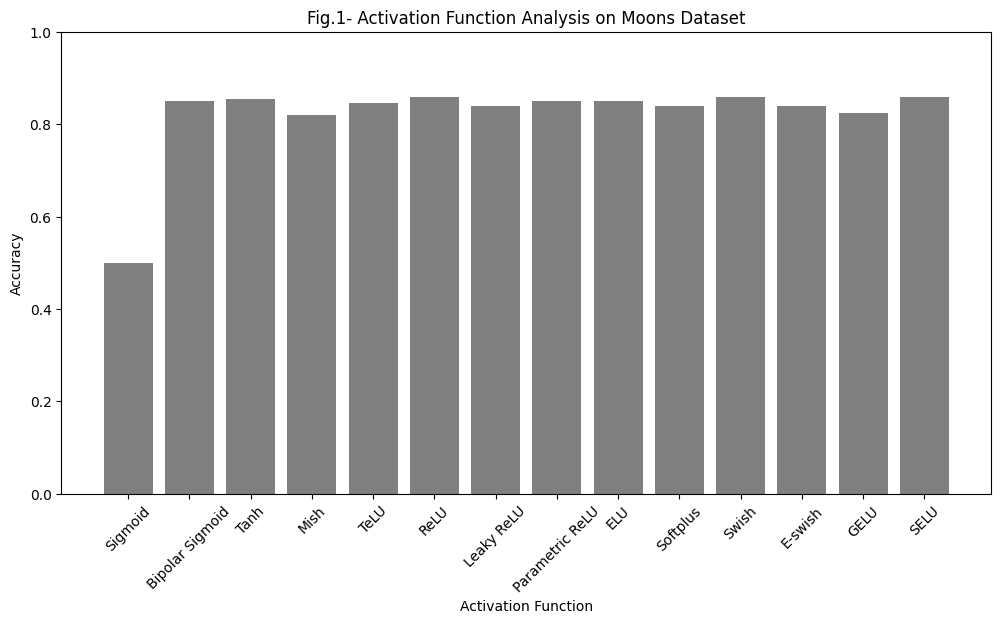

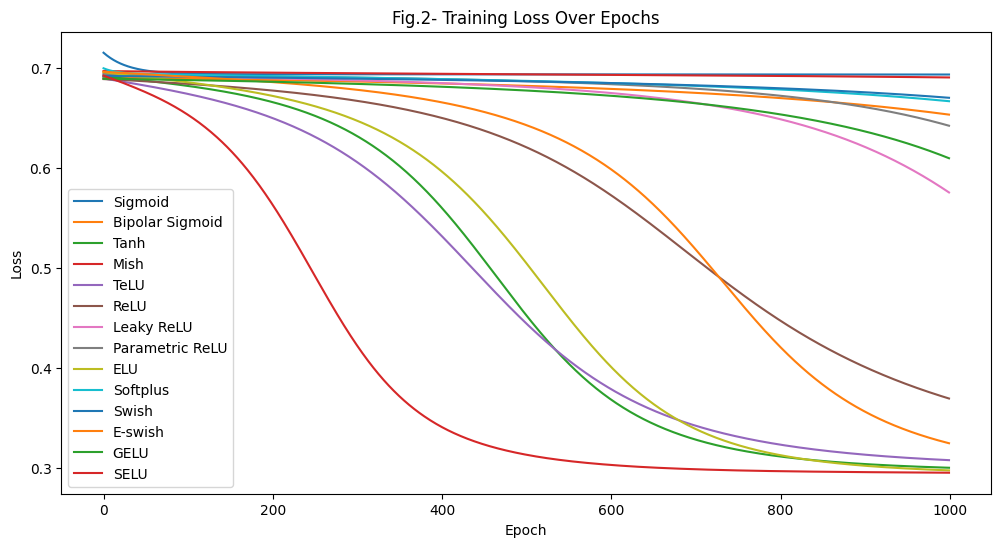

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Activation Functions and Their Derivatives
# -----------------------------

# 1. Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# 2. Bipolar Sigmoid (maps to (-1,1))
def bipolar_sigmoid(x):
    return 2 * sigmoid(x) - 1

def bipolar_sigmoid_derivative(x):
    # f(x) = 2σ(x)-1, so f'(x)= 2σ(x)(1-σ(x))
    s = sigmoid(x)
    return 2 * s * (1 - s)

# 3. Tanh
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 4. Mish: f(x)= x * tanh(softplus(x))
def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

def mish_derivative(x):
    # Approximate derivative:
    sp = np.log1p(np.exp(x))
    tanh_sp = np.tanh(sp)
    # Derivative approximation:
    return tanh_sp + x * sigmoid(x) * (1 - tanh_sp**2)

# 5. TeLU (Hyperbolic Tangent Exponential Linear Unit)
# For x>=0: f(x)= tanh(x), for x<0: f(x)= alpha*(exp(x)-1)
def telu(x, alpha=1.0):
    return np.where(x >= 0, np.tanh(x), alpha * (np.exp(x) - 1))

def telu_derivative(x, alpha=1.0):
    # For x>=0: derivative = 1 - tanh(x)**2; for x<0: derivative = alpha * exp(x)
    return np.where(x >= 0, 1 - np.tanh(x)**2, alpha * np.exp(x))

# 6. ReLU
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

# 7. Leaky ReLU
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# 8. Parametric ReLU (PReLU)
def prelu(x, alpha=0.25):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha=0.25):
    return np.where(x > 0, 1, alpha)

# 9. Exponential Linear Unit (ELU)
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# 10. Softmax (used as output activation; derivative is combined with cross-entropy loss)
def softmax(x):
    exp_shifted = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)

# 11. Softplus
def softplus(x):
    return np.log1p(np.exp(x))

def softplus_derivative(x):
    return sigmoid(x)

# 12. Swish: f(x)= x * sigmoid(x)
def swish(x):
    return x * sigmoid(x)

def swish_derivative(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

# 13. E-swish: f(x)= beta * x * sigmoid(x)
def e_swish(x, beta=1.5):
    return beta * x * sigmoid(x)

def e_swish_derivative(x, beta=1.5):
    s = sigmoid(x)
    return beta * (s + x * s * (1 - s))

# 14. GELU: f(x)= 0.5 * x * (1 + tanh( sqrt(2/pi)*(x+0.044715*x**3) ))
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi)*(x + 0.044715*np.power(x, 3))))

def gelu_derivative(x):
    # Approximate derivative of GELU:
    tanh_term = np.tanh(np.sqrt(2/np.pi)*(x + 0.044715*np.power(x,3)))
    term1 = 0.5 * (1 + tanh_term)
    term2 = (0.5 * x * (1 - np.power(tanh_term, 2)) *
             np.sqrt(2/np.pi) * (1 + 3*0.044715*np.power(x,2)))
    return term1 + term2

# 15. SELU (Scaled ELU): f(x)= lambda * (x if x>0 else alpha*(exp(x)-1))
def selu(x, lambda_=1.0507, alpha=1.67326):
    return lambda_ * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def selu_derivative(x, lambda_=1.0507, alpha=1.67326):
    return lambda_ * np.where(x > 0, 1, alpha * np.exp(x))

# -----------------------------
# Dictionary of Activation Functions
# -----------------------------
# For the hidden layers (output layer always uses softmax).
# Each entry is a tuple: (activation_function, derivative_function)
activation_functions = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Bipolar Sigmoid': (bipolar_sigmoid, bipolar_sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative),
    'Mish': (mish, mish_derivative),
    'TeLU': (telu, telu_derivative),
    'ReLU': (relu, relu_derivative),
    'Leaky ReLU': (leaky_relu, leaky_relu_derivative),
    'Parametric ReLU': (prelu, prelu_derivative),
    'ELU': (elu, elu_derivative),
    'Softplus': (softplus, softplus_derivative),
    'Swish': (swish, swish_derivative),
    'E-swish': (e_swish, e_swish_derivative),
    'GELU': (gelu, gelu_derivative),
    'SELU': (selu, selu_derivative)
}

# -----------------------------
# Data Preparation
# -----------------------------
# Create a moons dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X = StandardScaler().fit_transform(X)
# One-hot encode the two classes
y = y.reshape(-1, 1)
num_classes = 2
y_onehot = np.eye(num_classes)[y.flatten()]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
y_test_labels = np.argmax(y_test, axis=1)  # for computing accuracy

# -----------------------------
# Neural Network Implementation
# -----------------------------
class NeuralNetwork:
    def __init__(self, layers, activation_name='ReLU'):
        """
        layers: List of neurons per layer (e.g., [2, 10, 10, 2])
        activation_name: Name of the activation to use in hidden layers.
                         Output layer always uses softmax.
        """
        self.layers = layers
        # Gets activation function and its derivative from the dictionary.
        self.activation, self.activation_deriv = activation_functions[activation_name]

        # Initialize weights and biases for each layer.
        self.weights = []
        self.biases = []
        for i in range(len(layers) - 1):
            # Using a small random initialization.
            self.weights.append(np.random.randn(layers[i], layers[i+1]) * 0.1)
            self.biases.append(np.zeros((1, layers[i+1])))

    def forward(self, X):
        """Perform a forward pass and store intermediate values."""
        self.a = [X]  # activations (input is a[0])
        self.z = []   # linear combinations before activation
        for i in range(len(self.weights)):
            z = np.dot(self.a[-1], self.weights[i]) + self.biases[i]
            self.z.append(z)
            # Use softmax in the final layer.
            if i == len(self.weights) - 1:
                a = softmax(z)
            else:
                a = self.activation(z)
            self.a.append(a)
        return self.a[-1]

    def backward(self, y_true, lr=0.01):
        """
        Backward pass using gradient descent.
        y_true: one-hot encoded true labels.
        lr: learning rate.
        """
        m = y_true.shape[0]
        # For softmax with cross-entropy loss:
        dz = self.a[-1] - y_true  # shape: (m, output_dim)
        for i in reversed(range(len(self.weights))):
            dw = np.dot(self.a[i].T, dz) / m
            db = np.sum(dz, axis=0, keepdims=True) / m
            self.weights[i] -= lr * dw
            self.biases[i] -= lr * db
            if i > 0:
                dz = np.dot(dz, self.weights[i].T) * self.activation_deriv(self.z[i-1])

    def train(self, X, y, epochs=1000, lr=0.01, verbose=False):
        losses = []
        for epoch in range(epochs):
            output = self.forward(X)
            # Cross-entropy loss with a small epsilon to avoid log(0)
            loss = -np.mean(np.sum(y * np.log(output + 1e-8), axis=1))
            losses.append(loss)
            self.backward(y, lr)
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
        return losses

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# -----------------------------
# Train & Evaluate for Each Activation Function
# -----------------------------
results = {}
loss_history = {}
epochs = 1000
learning_rate = 0.01

for act_name in activation_functions.keys():
    print(f"Training with {act_name} activation...")
    nn = NeuralNetwork([2, 10, 10, 2], activation_name=act_name)
    losses = nn.train(X_train, y_train, epochs=epochs, lr=learning_rate, verbose=False)
    predictions = nn.predict(X_test)
    accuracy = np.mean(predictions == y_test_labels)
    results[act_name] = accuracy
    loss_history[act_name] = losses
    print(f"{act_name} Accuracy: {accuracy:.4f}")

# -----------------------------
# Plot Accuracy Comparison
# -----------------------------
plt.figure(figsize=(12, 6))
plt.bar(results.keys(), results.values(), color='grey')
plt.ylabel("Accuracy")
plt.xlabel("Activation Function")
plt.title("Fig.1- Activation Function Analysis on Moons Dataset")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Plot Loss Curves for Each Activation Function
# -----------------------------
plt.figure(figsize=(12, 6))
for name, losses in loss_history.items():
    plt.plot(losses, label=name)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Fig.2- Training Loss Over Epochs")
plt.legend()
plt.show()


# **OUTPUT ANAYSIS :**

---



The analysis of multilayer neural networks (MLNN) with various nonlinear activation functions highlights how each function influences learning dynamics, convergence speed, and overall model performance. Traditional functions like Sigmoid and Tanh are smooth and differentiable, making them suitable for shallow networks but are often prone to the vanishing gradient problem, which hampers learning in deeper architectures. The Bipolar Sigmoid offers a zero-centered output, slightly improving over Sigmoid but still shares similar limitations.

To counter these issues, ReLU and its variants like Leaky ReLU and Parametric ReLU (PReLU) emerged as popular choices due to their simplicity and efficiency. ReLU is computationally inexpensive and mitigates the vanishing gradient problem but can suffer from the dying ReLU issue where neurons become inactive. Leaky ReLU and PReLU address this by allowing a small, non-zero gradient when the input is negative. ELU further refines this by pushing mean activations closer to zero, which can speed up learning.

More recent activation functions like Mish, Swish, and E-swish introduce smoother non-linearities, leading to better gradient flow and improved performance, especially in deep networks. These functions have shown to outperform ReLU in specific tasks like image classification and natural language processing. Similarly, GELU (used in models like BERT and GPT) combines characteristics of ReLU and dropout, offering stochastic regularization that enhances generalization. SELU is designed for self-normalizing networks, helping to maintain stable mean and variance during training, which is crucial for deep architectures.


---



# **Problems Associated with Activation Functions :**

**1.Vanishing Gradient Problem**

The vanishing gradient problem occurs when gradients become exceedingly small during backpropagation, especially in deep networks. Activation functions like Sigmoid and Tanh squash input values into small ranges (Sigmoid: (0, 1), Tanh: (-1, 1)), leading to very small derivatives for large input magnitudes. As gradients propagate backward, they diminish exponentially, causing the early layers to learn very slowly or not at all. This severely limits the ability to train deep networks effectively.

**2.Exploding Gradient Problem**

The exploding gradient problem occurs when gradients grow exponentially during backpropagation, causing numerical instability. This is more prevalent in very deep networks or recurrent neural networks (RNNs) when using activation functions with large derivative values or improper weight initialization. Exploding gradients can result in large updates to model weights, leading to NaN losses or divergence during training.


# **Modifications to Handle Gradient Issues :**


Training with Sigmoid
Epoch 0, Loss: 0.7835
Epoch 100, Loss: 0.6797
Epoch 200, Loss: 0.6043
Epoch 300, Loss: 0.5483
Epoch 400, Loss: 0.5060
Epoch 500, Loss: 0.4734
Epoch 600, Loss: 0.4480
Epoch 700, Loss: 0.4278
Epoch 800, Loss: 0.4116
Epoch 900, Loss: 0.3983
Sigmoid Accuracy: 81.00%

Training with Tanh
Epoch 0, Loss: 0.4777
Epoch 100, Loss: 0.4147
Epoch 200, Loss: 0.3888
Epoch 300, Loss: 0.3720
Epoch 400, Loss: 0.3595
Epoch 500, Loss: 0.3497
Epoch 600, Loss: 0.3416
Epoch 700, Loss: 0.3350
Epoch 800, Loss: 0.3294
Epoch 900, Loss: 0.3247
Tanh Accuracy: 83.50%

Training with ReLU
Epoch 0, Loss: 0.8559
Epoch 100, Loss: 0.5063
Epoch 200, Loss: 0.4173
Epoch 300, Loss: 0.3713
Epoch 400, Loss: 0.3454
Epoch 500, Loss: 0.3296
Epoch 600, Loss: 0.3191
Epoch 700, Loss: 0.3116
Epoch 800, Loss: 0.3059
Epoch 900, Loss: 0.3014
ReLU Accuracy: 85.50%

Training with Leaky ReLU
Epoch 0, Loss: 1.1818
Epoch 100, Loss: 0.3850
Epoch 200, Loss: 0.3266
Epoch 300, Loss: 0.3092
Epoch 400, Loss: 0.3014
Epoch 500,

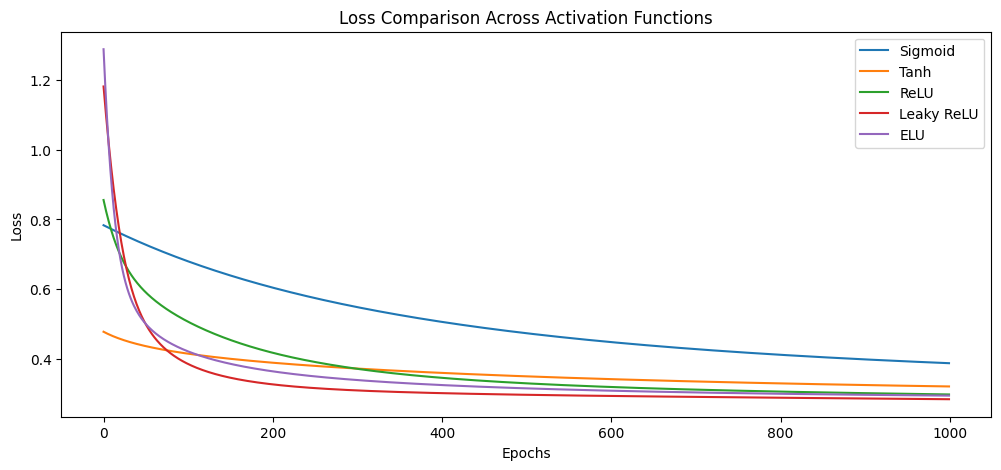

Sigmoid Final Accuracy: 81.00%
Tanh Final Accuracy: 83.50%
ReLU Final Accuracy: 85.50%
Leaky ReLU Final Accuracy: 87.50%
ELU Final Accuracy: 84.00%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Activation Functions & Derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return sigmoid(x) * (1 - sigmoid(x))

def tanh(x): return np.tanh(x)
def tanh_derivative(x): return 1 - np.tanh(x) ** 2

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

def leaky_relu(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def leaky_relu_derivative(x, alpha=0.01): return np.where(x > 0, 1, alpha)

def elu(x, alpha=1.0): return np.where(x > 0, x, alpha * (np.exp(x) - 1))
def elu_derivative(x, alpha=1.0): return np.where(x > 0, 1, alpha * np.exp(x))

# Softmax & Loss Function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    return -np.sum(y_true * np.log(y_pred + 1e-9)) / m

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation, activation_deriv, learning_rate=0.01):
        self.lr = learning_rate
        self.activation, self.activation_deriv = activation, activation_deriv
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        return softmax(self.Z2)

    def backward(self, X, y, output):
        m = y.shape[0]
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.activation_deriv(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            loss = cross_entropy(y, output)
            loss_history.append(loss)
            self.backward(X, y, output)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Data Preparation
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = OneHotEncoder(sparse_output=False).fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Experiments
activations = {
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative),
    'ReLU': (relu, relu_derivative),
    'Leaky ReLU': (leaky_relu, leaky_relu_derivative),
    'ELU': (elu, elu_derivative)
}

results = {}

for name, (act, act_deriv) in activations.items():
    print(f"\nTraining with {name}")
    nn = NeuralNetwork(2, 10, 2, act, act_deriv, learning_rate=0.01)
    loss_history = nn.train(X_train, y_train, epochs=1000)
    y_pred = nn.predict(X_test)
    y_true = np.argmax(y_test, axis=1)
    accuracy = np.mean(y_pred == y_true) * 100
    results[name] = (loss_history, accuracy)
    print(f"{name} Accuracy: {accuracy:.2f}%")

# Plot Results
plt.figure(figsize=(12,5))
for name, (loss_history, _) in results.items():
    plt.plot(loss_history, label=name)
plt.title("Loss Comparison Across Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Display Final Accuracies
for name, (_, accuracy) in results.items():
    print(f"{name} Final Accuracy: {accuracy:.2f}%")


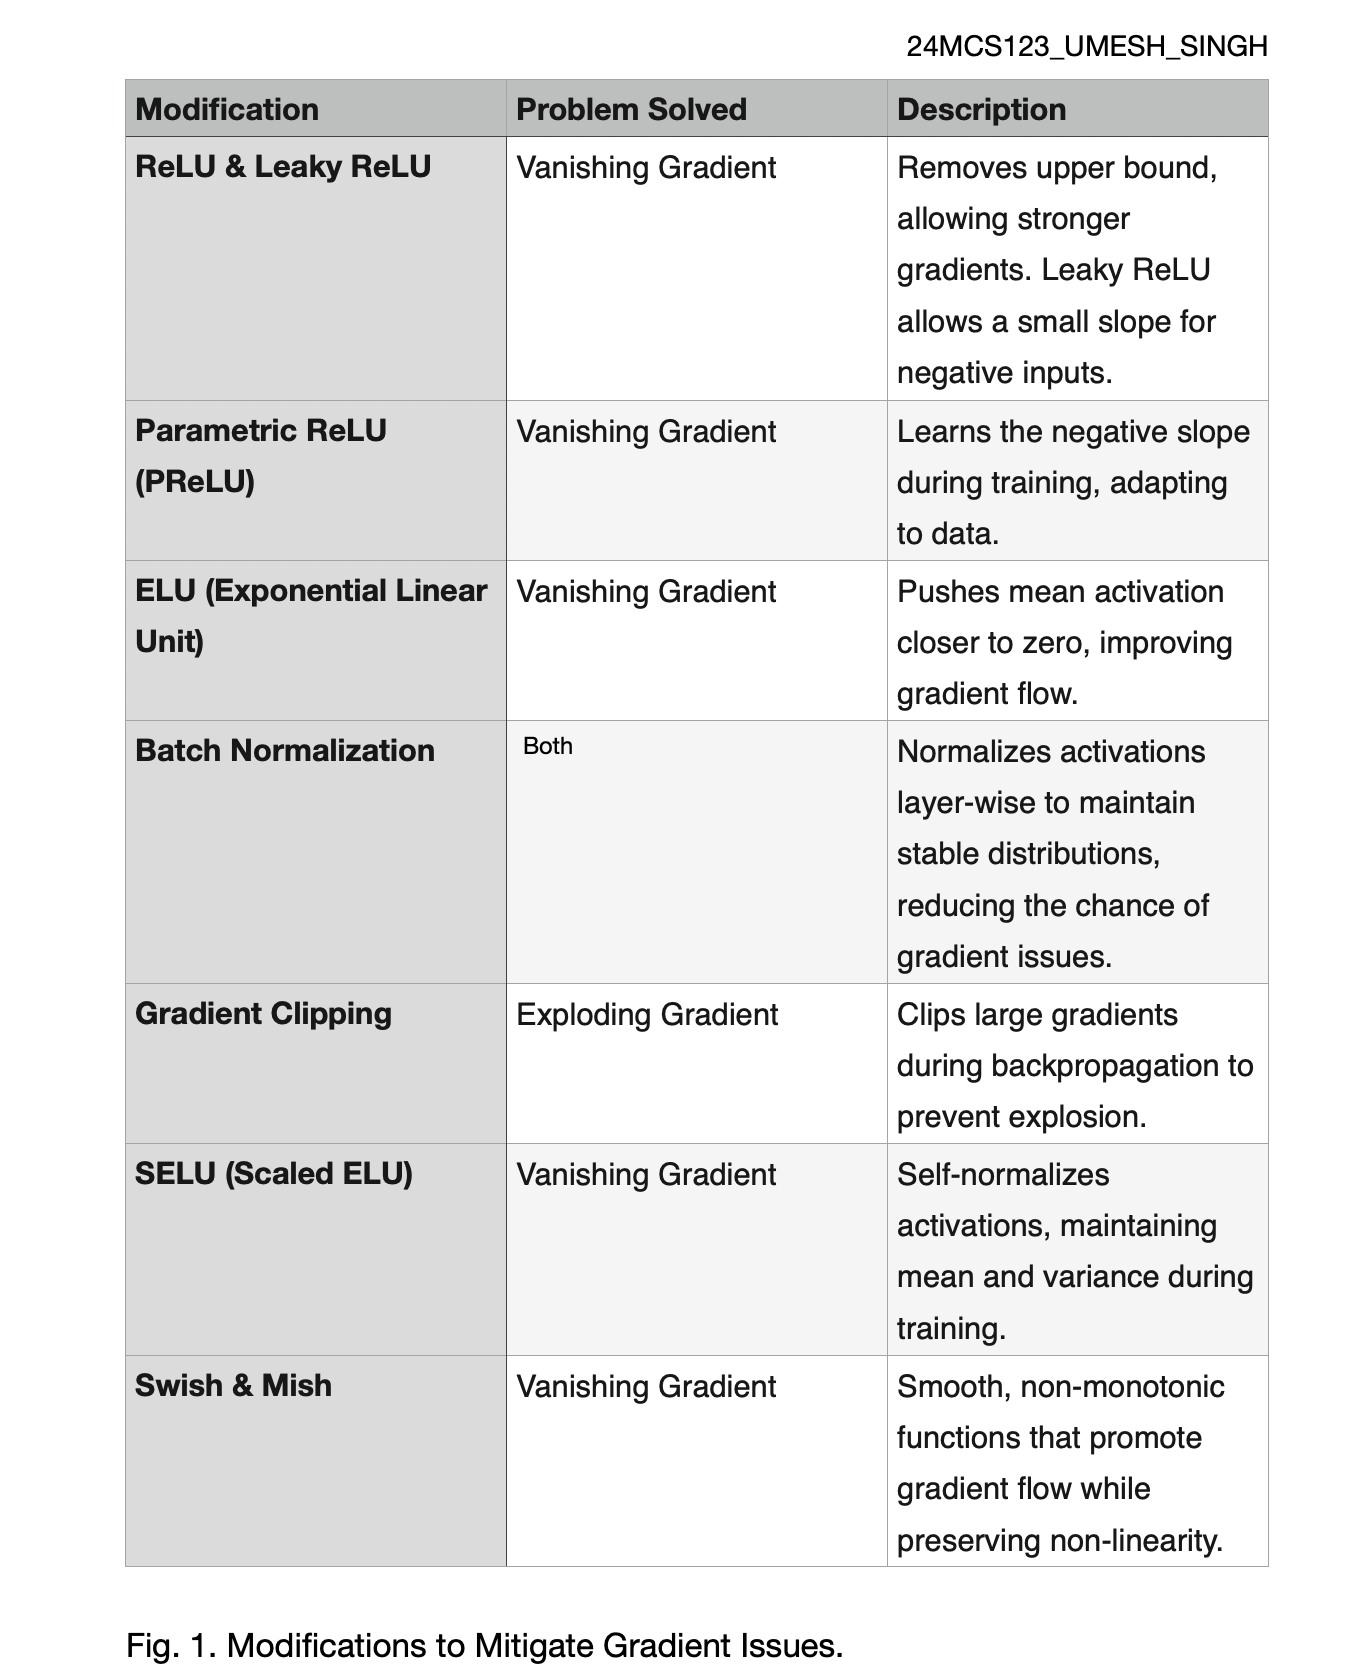

# **Performance of various activation functions for MNIST, Fashion-MNIST, CIFAR-10, and CIFAR-100 :**

**1. MNIST Dataset**

The MNIST dataset consists of grayscale images of handwritten digits (0–9) with a size of 28×28 pixels. It contains 60,000 training and 10,000 testing images. Although relatively simple, it serves as a benchmark for evaluating classification models, including the effects of activation functions.

 **2. Fashion-MNIST Dataset**

Fashion-MNIST contains grayscale images of clothing items like shirts, shoes, and trousers, also with a size of 28×28 pixels. Similar to MNIST, it has 60,000 training and 10,000 testing images. It is more challenging than MNIST, with more complex textures and shapes, providing a better evaluation of activation functions in image classification.

**3. CIFAR-10 Dataset**

CIFAR-10 consists of color images (RGB) of various objects such as airplanes, dogs, and trucks. Each image is 32×32 pixels in size, with 50,000 training and 10,000 testing images. This dataset is more challenging than MNIST and Fashion-MNIST due to its low resolution and the need for deeper networks to effectively classify the diverse object categories.

 **4. CIFAR-100 Dataset**

CIFAR-100 is a more complex version of CIFAR-10, containing 100 object categories, grouped into 20 superclasses. Like CIFAR-10, the images are 32×32 pixels and are in RGB format. This dataset is more challenging because of its fine-grained categorization and small image sizes, requiring sophisticated models for accurate classification.





In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset

# Define a proper activation function wrapper for those needing parameters
# Define activation functions with derivatives
class Sigmoid(nn.Module):
    def forward(self, x):
        return torch.sigmoid(x)

    def derivative(self, x):
        sig = torch.sigmoid(x)
        return sig * (1 - sig)

class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 * torch.sigmoid(x) - 1

    def derivative(self, x):
        sig = torch.sigmoid(x)
        return 2 * sig * (1 - sig)

class Tanh(nn.Module):
    def forward(self, x):
        return torch.tanh(x)

    def derivative(self, x):
        return 1 - torch.tanh(x) ** 2

class Mish(nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

    def derivative(self, x):
        sp = F.softplus(x)
        tanh_sp = torch.tanh(sp)
        return tanh_sp + x * (1 - tanh_sp**2) * torch.sigmoid(x)

class ReLU(nn.Module):
    def forward(self, x):
        return F.relu(x)

    def derivative(self, x):
        return (x > 0).float()

class LeakyReLU(nn.Module):
    def forward(self, x, alpha=0.01):
        return F.leaky_relu(x, negative_slope=alpha)

    def derivative(self, x, alpha=0.01):
        return torch.where(x > 0, torch.ones_like(x), torch.full_like(x, alpha))

class PReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(0.25))

    def forward(self, x):
        return F.prelu(x, self.alpha)

    def derivative(self, x):
        return torch.where(x > 0, torch.ones_like(x), self.alpha)

class ELU(nn.Module):
    def forward(self, x, alpha=1.0):
        return F.elu(x, alpha)

    def derivative(self, x, alpha=1.0):
        return torch.where(x > 0, torch.ones_like(x), alpha * torch.exp(x))

class Softplus(nn.Module):
    def forward(self, x):
        return F.softplus(x)

    def derivative(self, x):
        return torch.sigmoid(x)

class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

    def derivative(self, x):
        sig = torch.sigmoid(x)
        return sig + x * sig * (1 - sig)

class GELU(nn.Module):
    def forward(self, x):
        return F.gelu(x)

    def derivative(self, x):
        sqrt2 = torch.sqrt(torch.tensor(2.0))
        coeff = 0.5 * (1.0 + torch.erf(x / sqrt2))
        return coeff + x * torch.exp(-0.5 * x**2) / (sqrt2 * torch.sqrt(torch.tensor(3.141592)))

class SELU(nn.Module):
    def forward(self, x):
        return F.selu(x)

    def derivative(self, x):
        alpha = 1.67326
        scale = 1.0507
        return scale * torch.where(x > 0, torch.ones_like(x), alpha * torch.exp(x))
class TeLU(nn.Module):
    def __init__(self, alpha=1.0):
        super(TeLU, self).__init__()
        self.alpha = alpha

    def forward(self, x):
        return torch.where(x >= 0, torch.tanh(x), self.alpha * (torch.exp(x) - 1))

    def derivative(self, x):
        return torch.where(x >= 0, 1 - torch.tanh(x)**2, self.alpha * torch.exp(x))

class ESwish(nn.Module):
    def __init__(self, beta=1.5):
        super(ESwish, self).__init__()
        self.beta = beta

    def forward(self, x):
        return self.beta * x * torch.sigmoid(x)

    def derivative(self, x):
        sig = torch.sigmoid(x)
        return self.beta * (sig + x * sig * (1 - sig))

class ParametricReLU(nn.Module):
    def __init__(self):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(0.25))

    def forward(self, x):
        return F.prelu(x, self.alpha)

    def derivative(self, x):
        return torch.where(x > 0, torch.ones_like(x), self.alpha)



# **LeNet Architecture :**

LeNet is a foundational convolutional neural network designed for simpler image classification tasks, originally developed for digit recognition. It consists of two convolutional layers, each followed by a pooling layer to reduce the spatial dimensions of the feature maps. The final layers include fully connected layers leading to the output classification. LeNet is efficient for small datasets and relatively simple tasks, making it an excellent choice for evaluating basic activation functions on datasets like MNIST and Fashion-MNIST.

In [14]:
# Define the LeNet Model
class LeNet(nn.Module):
    def __init__(self, input_channels, num_classes, activation_function):
        super(LeNet, self).__init__()
        self.activation_function = activation_function

        self.conv1 = nn.Conv2d(input_channels, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)

        # Compute the fully connected layer input dynamically
        self._to_linear = None
        self.calculate_flattened_size(input_channels)

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def calculate_flattened_size(self, input_channels):
        with torch.no_grad():
            # Use the correct input shape for each dataset
            input_shape = (32, 32) if input_channels == 3 else (28, 28)
            dummy_input = torch.zeros(1, input_channels, *input_shape)
            x = self.conv1(dummy_input)
            x = F.max_pool2d(x, kernel_size=2, stride=2)
            x = self.conv2(x)
            x = F.max_pool2d(x, kernel_size=2, stride=2)
            self._to_linear = x.view(1, -1).shape[1]

    def forward(self, x):
        x = self.activation_function(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = self.activation_function(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(x.size(0), -1)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.fc3(x)  # No activation here, since we use CrossEntropyLoss

        return x

# Define the function to load datasets
def get_data_loader(dataset_name, subset_percentage):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == 'MNIST':
        dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    elif dataset_name == 'FashionMNIST':
        dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
    elif dataset_name == 'CIFAR10':
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
    elif dataset_name == 'CIFAR100':
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        dataset = torchvision.datasets.CIFAR100(root='./data', train=True, transform=transform, download=True)
    else:
        raise ValueError("Unsupported dataset")

    subset_size = int(len(dataset) * subset_percentage)
    subset = Subset(dataset, range(subset_size))
    return DataLoader(subset, batch_size=64, shuffle=True)


# Training function
def train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Define activation functions correctly
activation_functions = {
    'Sigmoid': Sigmoid(),
    'Bipolar Sigmoid': BipolarSigmoid(),
    'Tanh': Tanh(),
    'Mish': Mish(),
    'TeLU': TeLU(),
    'ReLU': ReLU(),
    'Leaky ReLU': LeakyReLU(), # Remove negative_slope from here
    'Parametric ReLU': ParametricReLU(),
    'ELU': ELU(),
    'Softplus': Softplus(),
    'Swish': Swish(),
    'E-swish': ESwish(),
    'GELU': GELU(),
    'SELU': SELU()
}



# Run training and evaluation for each dataset and activation function
datasets = ['MNIST', 'FashionMNIST', 'CIFAR10', 'CIFAR100']
subset_percentage = 0.1  # For training with fewer samples

# Initialize the dictionary to store accuracy for each dataset and activation function
accuracy_results = {dataset: {} for dataset in datasets}

for dataset_name in datasets:
    print(f"\nTraining for {dataset_name}")

    # Load dataset
    train_loader = get_data_loader(dataset_name, subset_percentage)
    test_loader = get_data_loader(dataset_name, subset_percentage)

    input_channels = 1 if dataset_name in ['MNIST', 'FashionMNIST'] else 3
    num_classes = 10 if dataset_name != 'CIFAR100' else 100

    for name, activation in activation_functions.items():
        print(f"\nTraining with {name} activation function...")

        # Initialize model
        model = LeNet(input_channels, num_classes, activation)

        # Define criterion and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train and evaluate the model
        accuracy = train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer, epochs=5)

        # Store accuracy results for each dataset and activation function
        accuracy_results[dataset_name][name] = accuracy
        print(f"Accuracy for {name} activation: {accuracy:.2f}%")




Training for MNIST

Training with Sigmoid activation function...
Accuracy for Sigmoid activation: 89.25%

Training with Bipolar Sigmoid activation function...
Accuracy for Bipolar Sigmoid activation: 96.58%

Training with Tanh activation function...
Accuracy for Tanh activation: 98.68%

Training with Mish activation function...
Accuracy for Mish activation: 98.25%

Training with TeLU activation function...
Accuracy for TeLU activation: 98.17%

Training with ReLU activation function...
Accuracy for ReLU activation: 96.07%

Training with Leaky ReLU activation function...
Accuracy for Leaky ReLU activation: 96.80%

Training with Parametric ReLU activation function...
Accuracy for Parametric ReLU activation: 97.43%

Training with ELU activation function...
Accuracy for ELU activation: 98.42%

Training with Softplus activation function...
Accuracy for Softplus activation: 96.97%

Training with Swish activation function...
Accuracy for Swish activation: 97.32%

Training with E-swish activat

100%|██████████| 170M/170M [00:04<00:00, 42.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Training with Sigmoid activation function...
Accuracy for Sigmoid activation: 25.12%

Training with Bipolar Sigmoid activation function...
Accuracy for Bipolar Sigmoid activation: 44.22%

Training with Tanh activation function...
Accuracy for Tanh activation: 53.24%

Training with Mish activation function...
Accuracy for Mish activation: 51.98%

Training with TeLU activation function...
Accuracy for TeLU activation: 52.10%

Training with ReLU activation function...
Accuracy for ReLU activation: 47.58%

Training with Leaky ReLU activation function...
Accuracy for Leaky ReLU activation: 45.94%

Training with Parametric ReLU activation function...
Accuracy for Parametric ReLU activation: 52.74%

Training with ELU activation function...
Accuracy for ELU activation: 55.40%

Training with Softplus activation function...
Accuracy for Softplus activation: 43.66%

Training with Swish activation function...

100%|██████████| 169M/169M [00:03<00:00, 43.3MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified

Training with Sigmoid activation function...
Accuracy for Sigmoid activation: 2.24%

Training with Bipolar Sigmoid activation function...
Accuracy for Bipolar Sigmoid activation: 12.02%

Training with Tanh activation function...
Accuracy for Tanh activation: 18.38%

Training with Mish activation function...
Accuracy for Mish activation: 19.94%

Training with TeLU activation function...
Accuracy for TeLU activation: 17.12%

Training with ReLU activation function...
Accuracy for ReLU activation: 14.92%

Training with Leaky ReLU activation function...
Accuracy for Leaky ReLU activation: 15.56%

Training with Parametric ReLU activation function...
Accuracy for Parametric ReLU activation: 18.56%

Training with ELU activation function...
Accuracy for ELU activation: 23.42%

Training with Softplus activation function...
Accuracy for Softplus activation: 9.80%

Training with Swish activation function...


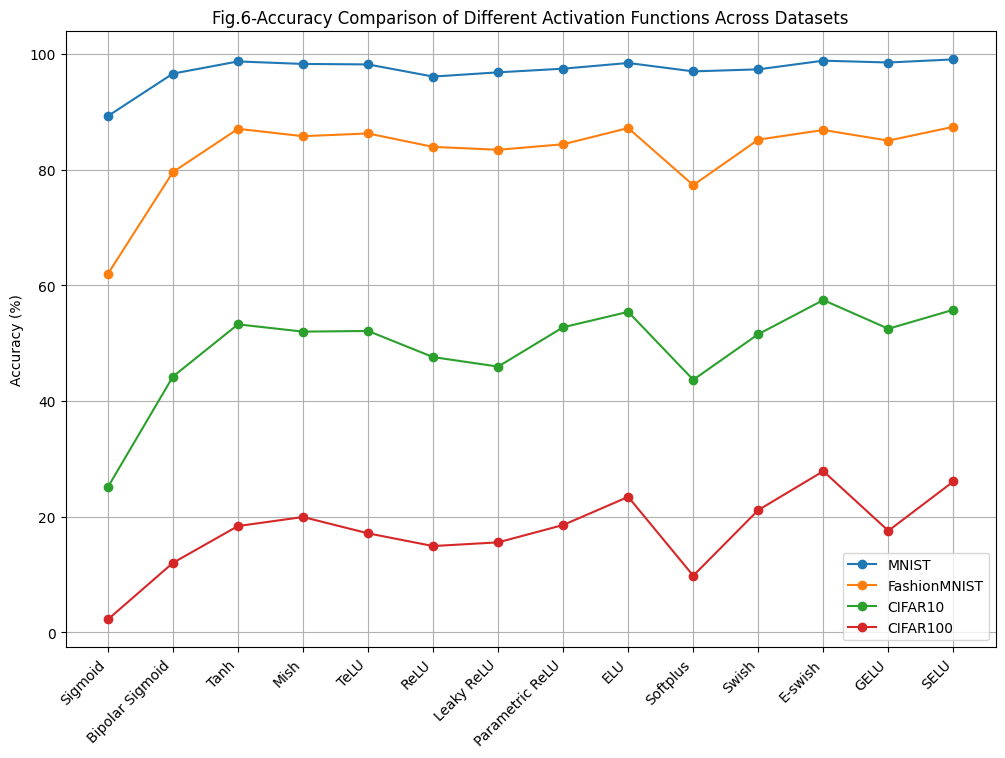

In [15]:
# Plot accuracy comparison
plt.figure(figsize=(12, 8))

for dataset_name in datasets:
    activations = list(accuracy_results[dataset_name].keys())
    accuracies = list(accuracy_results[dataset_name].values())

    x = np.arange(len(activations))
    plt.plot(x, accuracies, marker='o', linestyle='-', label=f'{dataset_name}')

plt.xticks(np.arange(len(activations)), activations, rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Fig.6-Accuracy Comparison of Different Activation Functions Across Datasets')
plt.legend()
plt.grid(True)
plt.show()

**OUTPUT ANALYSIS :**

---



The performance analysis across MNIST, Fashion-MNIST, CIFAR-10, and CIFAR-100 highlights the varying effectiveness of activation functions based on dataset complexity. On simpler datasets like MNIST, most functions performed well, with SELU (99.03%) and E-swish (98.82%) leading. Fashion-MNIST showed similar trends, with SELU again achieving the highest accuracy (87.38%). In more complex datasets like CIFAR-10 and CIFAR-100, simpler functions like Sigmoid and ReLU underperformed, while E-swish excelled with 57.44% (CIFAR-10) and 27.86% (CIFAR-100). Overall, SELU dominates in simpler tasks, while E-swish proves most effective for complex datasets, outperforming traditional activations.



---



# **ResNet Architecture :**

ResNet, or Residual Network, introduces skip connections to help with the training of very deep networks. These residual connections allow the network to bypass certain layers, preventing the vanishing gradient problem and enabling effective training of deeper architectures. In this study, a simplified version called ResNet-8 is used, which includes three convolutional layers with increasing filter sizes, along with three pooling layers for dimensionality reduction. ResNet is ideal for more complex datasets like CIFAR-10 and CIFAR-100, where deeper networks are necessary for higher accuracy.


Training for MNIST

Training with Sigmoid activation function...
Accuracy for Sigmoid activation: 98.03%

Training with Bipolar Sigmoid activation function...
Accuracy for Bipolar Sigmoid activation: 98.30%

Training with Tanh activation function...
Accuracy for Tanh activation: 98.08%

Training with Mish activation function...
Accuracy for Mish activation: 98.38%

Training with TeLU activation function...
Accuracy for TeLU activation: 97.65%

Training with ReLU activation function...
Accuracy for ReLU activation: 97.85%

Training with Leaky ReLU activation function...
Accuracy for Leaky ReLU activation: 98.02%

Training with Parametric ReLU activation function...
Accuracy for Parametric ReLU activation: 98.42%

Training with ELU activation function...
Accuracy for ELU activation: 98.63%

Training with Softplus activation function...
Accuracy for Softplus activation: 98.18%

Training with Swish activation function...
Accuracy for Swish activation: 98.73%

Training with E-swish activat

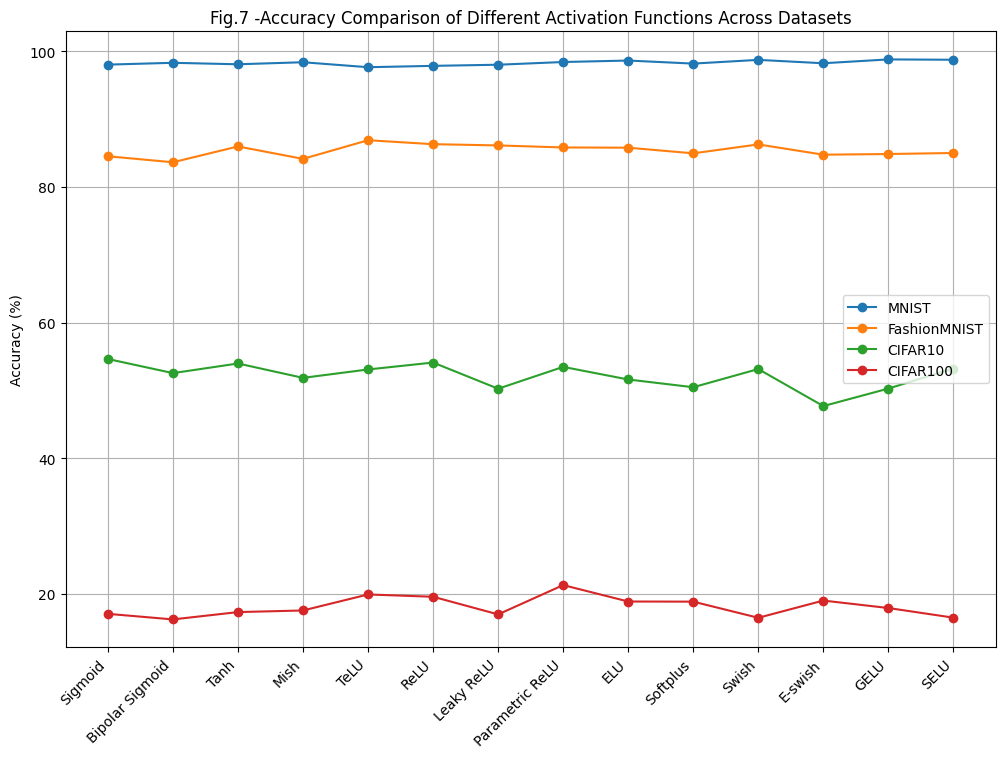

In [16]:
# Define a simplified ResNet-8 model with fewer layers
class ResNet8(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ResNet8, self).__init__()

        self.conv1 = nn.Conv2d(input_channels, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        # Dynamically calculate the input size for fc1
        self.fc1_input_size = self._get_fc1_input_size(input_channels)
        self.fc1 = nn.Linear(self.fc1_input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def _get_fc1_input_size(self, input_channels):
        """Calculates the input size for fc1 based on input channels and model architecture."""
        with torch.no_grad():
            # Use a dummy input with the correct input channels and image size
            # Adjust image size according to the dataset (28x28 for MNIST, 32x32 for others)
            image_size = 28 if input_channels == 1 else 32
            dummy_input = torch.zeros(1, input_channels, image_size, image_size)
            x = self.conv1(dummy_input)
            x = F.max_pool2d(x, kernel_size=2, stride=2)
            x = self.conv2(x)
            x = F.max_pool2d(x, kernel_size=2, stride=2)
            x = self.conv3(x)
            x = F.max_pool2d(x, kernel_size=2, stride=2)
            return x.view(1, -1).shape[1]  # Return the flattened size

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Define activation functions correctly
activation_functions = {
    'Sigmoid': Sigmoid(),
    'Bipolar Sigmoid': BipolarSigmoid(),
    'Tanh': Tanh(),
    'Mish': Mish(),
    'TeLU': TeLU(),
    'ReLU': ReLU(),
    'Leaky ReLU': LeakyReLU(),
    'Parametric ReLU': ParametricReLU(),
    'ELU': ELU(),
    'Softplus': Softplus(),
    'Swish': Swish(),
    'E-swish': ESwish(),
    'GELU': GELU(),
    'SELU': SELU()
}

# Initialize the dictionary to store accuracy for each dataset and activation function
accuracy_results1 = {dataset: {} for dataset in datasets}

# Run training and evaluation for each dataset and activation function
datasets = ['MNIST', 'FashionMNIST', 'CIFAR10', 'CIFAR100']
subset_percentage = 0.1  # For training with fewer samples

for dataset_name in datasets:
    print(f"\nTraining for {dataset_name}")

    # Load dataset
    train_loader = get_data_loader(dataset_name, subset_percentage)
    test_loader = get_data_loader(dataset_name, subset_percentage)

    input_channels = 1 if dataset_name in ['MNIST', 'FashionMNIST'] else 3
    num_classes = 10 if dataset_name != 'CIFAR100' else 100

    for name, activation in activation_functions.items():
        print(f"\nTraining with {name} activation function...")

        # Initialize model (ResNet8)
        model = ResNet8(input_channels, num_classes)

        # Define criterion and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Train and evaluate the model
        accuracy = train_and_evaluate_model(model, train_loader, test_loader, criterion, optimizer, epochs=5)

        # Store accuracy results for each dataset and activation function
        accuracy_results1[dataset_name][name] = accuracy
        print(f"Accuracy for {name} activation: {accuracy:.2f}%")

# Plot accuracy comparison
plt.figure(figsize=(12, 8))

for dataset_name in datasets:
    activations = list(accuracy_results1[dataset_name].keys())
    accuracies = list(accuracy_results1[dataset_name].values())

    x = np.arange(len(activations))
    plt.plot(x, accuracies, marker='o', linestyle='-', label=f'{dataset_name}')

plt.xticks(np.arange(len(activations)), activations, rotation=45, ha='right')
plt.ylabel('Accuracy (%)')
plt.title('Fig.7 -Accuracy Comparison of Different Activation Functions Across Datasets')
plt.legend()
plt.grid(True)

**OUTPUT ANALYSIS :**


---


In the activation function experiments, GELU (98.80%) and SELU (98.75%) performed best on the MNIST dataset, showing that smooth non-linear activations excel on simpler data. For FashionMNIST, TeLU (86.88%) and ReLU (86.30%) led the results, indicating that ReLU variants handle moderate complexity well. In CIFAR-10, although overall accuracy was lower, Sigmoid (54.62%) slightly outperformed ReLU, which was unexpected. For the more complex CIFAR-100 dataset, Parametric ReLU (21.28%) outperformed others, showing that adaptable activations with learnable parameters help in handling multi-class complexity. Overall, smooth activations work best for simpler datasets, while complex datasets benefit from adaptive functions like PReLU.


---



# **Conclusion :**

In this experiment, various activation functions were tested across LeNet and ResNet architectures on four datasets of varying complexity. While simpler datasets like MNIST yielded high accuracy with a range of activation functions, performance significantly decreased on more complex datasets like CIFAR-100, particularly for LeNet. ResNet demonstrated better handling of these complex datasets, but challenges remain in achieving high accuracy for tasks with a larger number of classes and intricate features.

# **References :**

[1] S. Raschka, "Python Machine Learning," Packt Publishing, 2015.

[2] WikiDocs, "Activation Functions in Neural Networks," [Online]. Available: https://wikidocs.net/235713. [Accessed: 09-Feb-2025].

[3] V7 Labs, "A Comprehensive Guide to Neural Network Activation Functions," [Online]. Available: https://www.v7labs.com/blog/neural-networks-activation-functions. [Accessed: 09-Feb-2025].

[4] A. Bomb, "Simple NN with Python - Multi-Layer Perceptron," Kaggle, [Online]. Available: https://www.kaggle.com/code/androbomb/simple-nn-with-python-multi-layer-perceptron#Neural-Network's-Layer(s). [Accessed: 09-Feb-2025].

[5] J. Krizhevsky, "CIFAR-10 Dataset," [Online]. Available: https://www.cs.toronto.edu/~kriz/cifar.html. [Accessed: 09-Feb-2025].

[6] E. Alcaide, "E-swish Activation Function," GitHub, [Online]. Available: https://github.com/EricAlcaide/E-swish. [Accessed: 09-Feb-2025].

[7] A. Zhang, "Activation Functions," *Dive into Deep Learning*, [Online]. Available: https://d2l.ai/chapter_multilayer-perceptrons/mlp.html#activation-functions. [Accessed: 09-Feb-2025].

[8] S. Ioffe and C. Szegedy, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift," in *Proceedings of the 32nd International Conference on Machine Learning (ICML 2015)*, Lille, France, 2015, pp. 448–456.

[9] Y. He, X. Zhang, and J. Sun, "Deep Residual Learning for Image Recognition," in *Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR)*, Las Vegas, NV, USA, 2016, pp. 770–778.
